# I create simple recommender engine. This engine based on "Item_based_recommender".
(referrence: https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# データフレーム下
df = pd.read_csv('csv/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# 欠損値確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
# 映画タイトル取得
movies = pd.read_csv('csv/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# タイトルとマージする
df = pd.merge(df, movies, on='movieId')

df.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [7]:
# 不要な列を削除
df = df.drop(['genres'], axis=1)
df.sample(5)

,userId,movieId,rating,timestamp,title
76727,597,2871,5.0,941640860,Deliverance (1972)
92420,182,2474,4.0,1055157686,"Color of Money, The (1986)"
31966,240,435,3.0,849122370,Coneheads (1993)
36406,362,5349,4.0,1530640272,Spider-Man (2002)
38543,413,8665,5.0,1484439902,"Bourne Supremacy, The (2004)"


In [8]:
# 平均と標準偏差
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
# 映画毎にレーティングの平均導出
ratings = pd.DataFrame(df.groupby(['title'])['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [10]:
# レーティングされた数を導出
ratings['number_of_ratings'] = df.groupby(['title'])['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [11]:
# レーティングされた数の平均など
ratings.describe()

,rating,number_of_ratings
count,9719.000000,9719.000000
mean,3.262388,10.375141
std,0.870004,22.406220
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.910357,9.000000
max,5.000000,329.000000


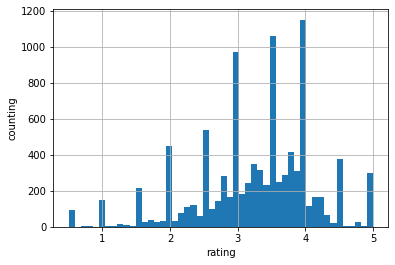

In [12]:
# レーティングの分布
ratings['rating'].hist(bins=50)
plt.xlabel('rating')
plt.ylabel('counting')
plt.show()

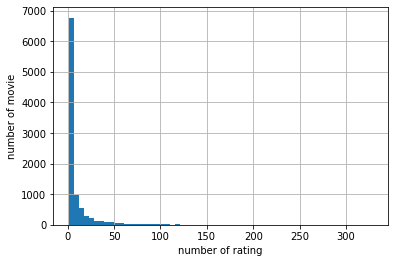

In [13]:
# レーティングされた合計
ratings['number_of_ratings'].hist(bins=60)
plt.xlabel('number of rating')
plt.ylabel('number of movie')
plt.show()

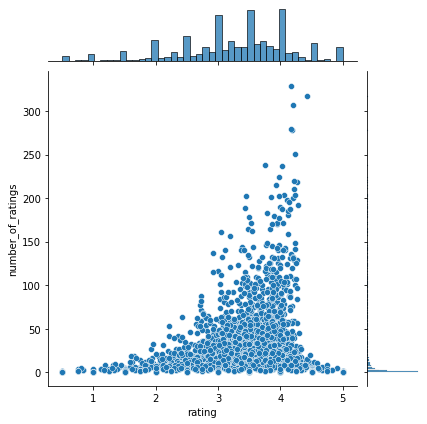

In [14]:
# 上記二つのグラフから散布図にする
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)
plt.show()

In [15]:
# 行をuserID、列をtitle、フィールド値をratingのデータフレーム作成
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# レビューされた数のTOP10
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [17]:
# 映画のレビューとレビュー総数でデータフレーム作成
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

# 'Air Force One (1997)'のレビューの高さ
AFO_user_rating.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Air Force One (1997), dtype: float64

In [18]:
# 'Contact (1997)'のレビューの高さ
contact_user_rating.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Contact (1997), dtype: float64

In [20]:
# corrwith関数で'Air Force One'と類似しているシリーズを作成
similar_to_air_force_one = movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [21]:
# 'Contact'と類似してるシリーズ
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [22]:
# 上記のシリーズをデータフレームにする
corr_contact = pd.DataFrame(similar_to_contact, columns=['correlation'])
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])

corr_AFO.head()

,correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN


In [23]:
# 欠損している行を削除する
corr_contact.dropna(inplace=True)
corr_AFO.dropna(inplace=True)

corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [24]:
corr_contact.head()

,correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [25]:
# レビュー数と結合する
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])

corr_AFO.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [26]:
# レビュー数が100以上の値のみにする
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [27]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
